# 0 - Dividing the dataset_rares_species into train,val,test (we run this once)

In [ ]:
!pip install keras_cv
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
'''
drive.mount('/content/drive')

drive_root = '/content/drive/MyDrive/Colab Notebooks/Deep Learning'
dataset_dir = os.path.join(drive_root, "dataset_rares_species")  # Folder with raw images
metadata_path = os.path.join(drive_root, "species_metadata.csv")  # Path to CSV
output_dir = os.path.join(drive_root, "data")  # Where to save splits (train/val/test)

# here we creaet the ouptut directories
os.makedirs(os.path.join(output_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test"), exist_ok=True)

'''

'\ndrive.mount(\'/content/drive\')\n\ndrive_root = \'/content/drive/MyDrive/Colab Notebooks/Deep Learning\'\ndataset_dir = os.path.join(drive_root, "dataset_rares_species")  # Folder with raw images\nmetadata_path = os.path.join(drive_root, "species_metadata.csv")  # Path to CSV\noutput_dir = os.path.join(drive_root, "data")  # Where to save splits (train/val/test)\n\n# here we creaet the ouptut directories\nos.makedirs(os.path.join(output_dir, "train"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "val"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "test"), exist_ok=True)\n\n'

In [ ]:
'''
df = pd.read_csv(metadata_path)

# holdout method
train_val_df, test_df = train_test_split(df,test_size=0.15,stratify=df['family'],random_state=42)

train_df, val_df = train_test_split(train_val_df,test_size=0.15/0.85,  stratify=train_val_df['family'],random_state=42)
'''

"\ndf = pd.read_csv(metadata_path)\n\n# holdout method\ntrain_val_df, test_df = train_test_split(df,test_size=0.15,stratify=df['family'],random_state=42)\n\ntrain_df, val_df = train_test_split(train_val_df,test_size=0.15/0.85,  stratify=train_val_df['family'],random_state=42)\n"

In [ ]:
'''
def copy_images(split_df, split_name):
    for _, row in tqdm(split_df.iterrows(), desc=f"Copying {split_name} images"):
        # Source path: Parse from 'file_path' column
        src_path = os.path.join(dataset_dir, row['file_path'])

        dest_dir = os.path.join(output_dir, split_name, row['family'])
        os.makedirs(dest_dir, exist_ok=True)

        filename = os.path.basename(row['file_path'])
        dest_path = os.path.join(dest_dir, filename)

        if os.path.exists(src_path):
            copyfile(src_path, dest_path)
        else:
            print(f"Warning: {src_path} not found")

copy_images(train_df, "train")
copy_images(val_df, "val")
copy_images(test_df, "test")
'''

'\ndef copy_images(split_df, split_name):\n    for _, row in tqdm(split_df.iterrows(), desc=f"Copying {split_name} images"):\n        # Source path: Parse from \'file_path\' column\n        src_path = os.path.join(dataset_dir, row[\'file_path\'])\n\n        dest_dir = os.path.join(output_dir, split_name, row[\'family\'])\n        os.makedirs(dest_dir, exist_ok=True)\n\n        filename = os.path.basename(row[\'file_path\'])\n        dest_path = os.path.join(dest_dir, filename)\n\n        if os.path.exists(src_path):\n            copyfile(src_path, dest_path)\n        else:\n            print(f"Warning: {src_path} not found")\n\ncopy_images(train_df, "train")\ncopy_images(val_df, "val")\ncopy_images(test_df, "test")\n'

Copying train images: 464it [07:56,  1.19it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/28260824_1065329_eol-full-size-copy.jpg not found
Copying train images: 5104it [1:12:41,  1.17it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/28214440_1065290_eol-full-size-copy.jpg not found
Copying train images: 7311it [1:43:10,  1.19it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/28260831_1065329_eol-full-size-copy.jpg not found
Copying train images: 7968it [1:52:16,  1.18it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/28214384_1065290_eol-full-size-copy.jpg not found
Copying train images: 8387it [1:58:04,  1.18it/s]
Copying val images: 626it [08:41,  1.31it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/22375122_1065346_eol-full-size-copy.jpg not found
Copying val images: 1798it [24:38,  1.22it/s]
Copying test images: 98it [01:21,  1.15it/s]Warning: /content/drive/MyDrive/Colab Notebooks/Deep Learning/dataset_rares_species/arthropoda_apidae/28408134_1065346_eol-full-size-copy.jpg not found
Copying test images: 1798it [24:39,  1.22it/s]

#0 - Creating a subset of the data do the tests (we run this once)

In [ ]:
'''
import os
import random
import shutil
from pathlib import Path
from tqdm import tqdm
random.seed(42)

drive_root = '/content/drive/MyDrive/Colab Notebooks/Deep Learning'
data_dir = os.path.join(drive_root, "data")
exp_dir = os.path.join(drive_root, "experimentation")

train_size = 1676
val_size = 358
test_size = 358

os.makedirs(os.path.join(exp_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(exp_dir, "val"), exist_ok=True)
os.makedirs(os.path.join(exp_dir, "test"), exist_ok=True)

def create_subset(src_dir, dest_dir, target_size):
    class_folders = [f for f in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, f))]

    total_images = 0
    class_counts = {}
    for cls in class_folders:
        cls_path = os.path.join(src_dir, cls)
        image_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[cls] = len(image_files)
        total_images += len(image_files)

    class_samples = {}
    remaining = target_size
    for cls, count in class_counts.items():
        samples = max(1, int(count * target_size / total_images))
        class_samples[cls] = min(samples, count)
        remaining -= class_samples[cls]

    if remaining > 0:
        classes_sorted = sorted(class_counts.keys(), key=lambda c: class_counts[c], reverse=True)
        for cls in classes_sorted:
            if class_samples[cls] < class_counts[cls]:
                class_samples[cls] += 1
                remaining -= 1
            if remaining == 0:
                break
    elif remaining < 0:
        classes_sorted = sorted(class_counts.keys(), key=lambda c: class_counts[c], reverse=True)
        for cls in classes_sorted:
            if class_samples[cls] > 1:
                class_samples[cls] -= 1
                remaining += 1
            if remaining == 0:
                break


    for cls in tqdm(class_folders, desc=f"Creating subset in {os.path.basename(dest_dir)}"):
        src_class_dir = os.path.join(src_dir, cls)
        dest_class_dir = os.path.join(dest_dir, cls)
        os.makedirs(dest_class_dir, exist_ok=True)
        image_files = [f for f in os.listdir(src_class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


        samples_to_take = min(class_samples[cls], len(image_files))
        sampled_files = random.sample(image_files, samples_to_take)

        for file in sampled_files:
            src_file = os.path.join(src_class_dir, file)
            dest_file = os.path.join(dest_class_dir, file)
            shutil.copy2(src_file, dest_file)

    copied_total = 0
    for cls in class_folders:
        dest_class_dir = os.path.join(dest_dir, cls)
        if os.path.exists(dest_class_dir):
            copied_total += len(os.listdir(dest_class_dir))

    print(f"Copied {copied_total} images to {os.path.basename(dest_dir)}")
    return copied_total

print("Creating experimentation dataset...")
train_copied = create_subset(
    os.path.join(data_dir, "train"),
    os.path.join(exp_dir, "train"),
    train_size
)

val_copied = create_subset(
    os.path.join(data_dir, "val"),
    os.path.join(exp_dir, "val"),
    val_size
)

test_copied = create_subset(
    os.path.join(data_dir, "test"),
    os.path.join(exp_dir, "test"),
    test_size
)

print(f"\nExperimentation dataset created:")
print(f"Train: {train_copied} images")
print(f"Validation: {val_copied} images")
print(f"Test: {test_copied} images")
print(f"Total: {train_copied + val_copied + test_copied} images")

'''

'\nimport os\nimport random\nimport shutil\nfrom pathlib import Path\nfrom tqdm import tqdm\nrandom.seed(42)\n\ndrive_root = \'/content/drive/MyDrive/Colab Notebooks/Deep Learning\'\ndata_dir = os.path.join(drive_root, "data")  \nexp_dir = os.path.join(drive_root, "experimentation")  \n\ntrain_size = 1676\nval_size = 358\ntest_size = 358\n\nos.makedirs(os.path.join(exp_dir, "train"), exist_ok=True)\nos.makedirs(os.path.join(exp_dir, "val"), exist_ok=True)\nos.makedirs(os.path.join(exp_dir, "test"), exist_ok=True)\n\ndef create_subset(src_dir, dest_dir, target_size):\n    class_folders = [f for f in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, f))]\n\n    total_images = 0\n    class_counts = {}\n    for cls in class_folders:\n        cls_path = os.path.join(src_dir, cls)\n        image_files = [f for f in os.listdir(cls_path) if f.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\'))]\n        class_counts[cls] = len(image_files)\n        total_images += len(image_files)\n\n  

Creating experimentation dataset...

Creating subset in train: 100%|██████████| 202/202 [03:16<00:00,  1.03it/s]

Copied 1676 images to train

Creating subset in val: 100%|██████████| 202/202 [02:49<00:00,  1.19it/s]

Copied 358 images to val

Creating subset in test: 100%|██████████| 202/202 [02:48<00:00,  1.20it/s]

Copied 358 images to test

Experimentation dataset created:

- Train: 1676 images

- Validation: 358 images

- Test: 358 images

- Total: 2392 images


# 1. Setup and Imports

## 1.1 Importing libraries

In [ ]:
#some basic libraries
import os
import time
import math
import random
from pathlib import Path
from shutil import copyfile
from typing import Any, Dict, List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# tensorflow e keras
import tensorflow as tf
import tensorflow_hub as hub
import keras
import keras_tuner as kt
from keras import Model, Sequential, layers
from keras.applications import ResNet50,MobileNetV2

from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,GlobalAveragePooling2D,add,LayerNormalization,RandomFlip,RandomRotation,RandomBrightness,RandomContrast,RandomTranslation,RandomZoom, Pipeline
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.metrics import Accuracy,Precision,Recall,AUC,F1Score,CategoricalAccuracy

from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler,EarlyStopping

from keras.preprocessing import image_dataset_from_directory

import keras_cv

from google.colab import drive


drive.mount('/content/drive')

drive_root = '/content/drive/MyDrive/Colab Notebooks/Deep Learning'
metadata_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/species_metadata.csv'


df = pd.read_csv(metadata_path)



Mounted at /content/drive


## 1.2 - Dataset Loading and Preprocessing

In [ ]:
num_classes = 202
batch_size = 64
input_shape = (224, 224, 3)
image_size = (224, 224)
value_range = (0.0, 1.0)

If we select false below, we are using the full dataset and not the sample

In [ ]:
USE_SUBSET = False

if USE_SUBSET:
    data_source = os.path.join(drive_root, "experimentation")
    print("Using EXPERIMENTAL SUBSET for faster training")
else:
    data_source = os.path.join(drive_root, "data")
    print("Using FULL DATASET for final training")

Using FULL DATASET for final training


In [ ]:
train_ds = image_dataset_from_directory(
    os.path.join(data_source, "train"),
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    interpolation="bilinear",
    shuffle=True,
    seed=42
)

val_ds = image_dataset_from_directory(
    os.path.join(data_source, "val"),
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    interpolation="bilinear",
    shuffle=False
)

test_ds = image_dataset_from_directory(
    os.path.join(data_source, "test"),
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    interpolation="bilinear",
    shuffle=False
)

Found 8383 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.


### Prefetching and Parallelizing data transformation

Source:https://www.tensorflow.org/guide/data_performance#prefetching

"Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

Note that the prefetch transformation provides benefits any time there is an opportunity to overlap the work of a "producer" with the work of a "consumer." "

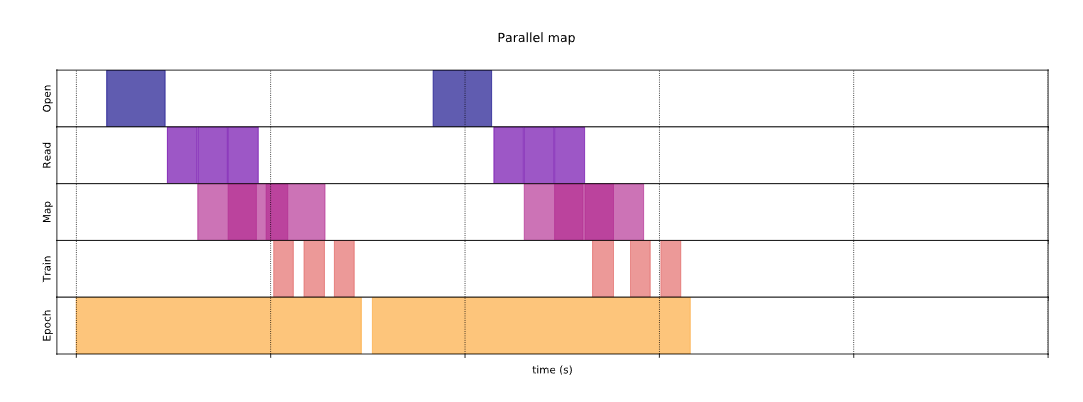

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)


## 1.4 Check and verify GPU availability

Source: https://stackoverflow.com/questions/71952532/automatically-check-available-gpu-on-google-colab

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Apr 16 21:34:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P0             27W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 2 - Helper Classes and Functions

Source: pratical class 5, utils.py

In [ ]:
def exp_decay_lr_scheduler(
    epoch: int,
    current_lr: float,
    factor: float = 0.95
) -> float:
    current_lr *= factor
    return current_lr

# 3. Defining Data Augmentation Strategies

We are going to define 3 different augmentation pipelines with varying levels of complexity.

Source: pratical class 4

In [ ]:
simple_augmentation = Pipeline(
    [
        RandomBrightness(factor=0.1, value_range=value_range),
        RandomFlip("horizontal"),
        RandomRotation(factor=0.1, fill_mode="reflect")
    ],
    name="simple_augmentation"
)

medium_augmentation = Pipeline(
    [
        RandomBrightness(factor=0.15, value_range=value_range),
        RandomFlip("horizontal"),
        RandomRotation(factor=0.15, fill_mode="reflect"),
        RandomContrast(factor=0.1, value_range=value_range),
        RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode="reflect")
    ],
    name="medium_augmentation"
)

complex_augmentation = Pipeline(
    [
        RandomBrightness(factor=0.2, value_range=value_range),
        RandomFlip("horizontal"),
        RandomFlip("vertical"),
        RandomRotation(factor=0.3, fill_mode="reflect"),
        RandomContrast(factor=0.2, value_range=value_range),
        RandomTranslation(height_factor=0.15, width_factor=0.15, fill_mode="reflect"),
        RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2), fill_mode="reflect"),

    ],
    name="complex_augmentation"
)

The function below selects the augmentation based on complexity level

In [ ]:
def get_augmentation(complexity="medium"):
    if complexity.lower() == "simple":
        return simple_augmentation
    elif complexity.lower() == "complex":
        return complex_augmentation
    else:
        return medium_augmentation

# 4. Architecture

##### GlobalAveragePooling2D justification

In our rare species classification project, we chose to use GlobalAveragePooling2D instead of Flatten for several compelling reasons:

1. Parameter Efficiency: Using GlobalAveragePooling2D dramatically reduces model complexity. As noted by Saturn Cloud, "If the final tensor shape before flattening is still large... Flatten will make an insane amount of parameters," while GlobalAveragePooling2D significantly condenses these parameters . This is crucial when dealing with rare species classification where we have 202 classes and limited training samples.

2. Regularization Effect: GlobalAveragePooling2D serves as an inherent regularizer that helps prevent overfitting, which is particularly important for imbalanced datasets like ours. Stack Overflow discussions point out that GlobalAveragePooling2D is "less prone to overfitting than a normal fully connected layer" .

3. Translation Invariance: For species classification, we care more about the presence of distinctive features than their exact location. GlobalAveragePooling2D preserves this translation invariance property by averaging across spatial dimensions . This makes our model more robust to variations in how species appear in different images.

4. Modern Architecture Design: Most state-of-the-art CNN architectures like ResNet, DenseNet, and Inception use GlobalAveragePooling2D instead of Flatten. As noted by StackAbuse, "Global Pooling condenses all of the feature maps into a single one, pooling all of the relevant information into a single map that can be easily understood by a single dense classification layer" .

5. Memory Efficiency: The computational advantage is significant - a Stack Overflow thread explains that for a tensor shape like (16, 240, 240, 128), Flatten would create 7,372,800 parameters, while GlobalAveragePooling2D produces just 128 . This efficiency was essential for our limited computational resources.

Sources:
1. Saturn Cloud Blog (2023): "Understanding the Difference Between Flatten() and GlobalAveragePooling2D() in Keras"
https://saturncloud.io/blog/understanding-the-difference-between-flatten-and-globalaveragepooling2d-in-keras/

2. Stack Overflow: "What is the difference between Flatten() and GlobalAveragePooling2D() in keras"
https://stackoverflow.com/questions/49295311/what-is-the-difference-between-flatten-and-globalaveragepooling2d-in-keras
3. StackAbuse (2023): "Don't Use Flatten() - Global Pooling for CNNs with TensorFlow and Keras"
https://stackabuse.com/dont-use-flatten-global-pooling-for-cnns-with-tensorflow-and-keras/
4. Data Science Stack Exchange: "Is Flatten() layer in keras necessary?"
https://datascience.stackexchange.com/questions/80072/is-flatten-layer-in-keras-necessary
5. Digital Ocean (2024): "Global Pooling in Convolutional Neural Networks"
https://www.digitalocean.com/community/tutorials/global-pooling-in-convolutional-neural-networks

##### Frozing layers justification

https://keras.io/guides/transfer_learning/

## ResNet50

ResNet doesn't require dropout because it already implements batch normalization layers that provide sufficient regularization effects. Additionally, the skip connections in ResNet's architecture maintain a healthy gradient flow through the network, which helps prevent overfitting without the need for dropout. Research has consistently shown that adding dropout to ResNet architectures provides minimal benefits and can actually disrupt the benefits of the residual connections.

In [ ]:
class RareSpeciesResNet(Model):

    def __init__(self, num_classes, unfrozen_layers=10, augmentation_type="medium"):

        super().__init__()

        self.num_classes = num_classes
        self.augmentation_layer = get_augmentation(augmentation_type)
        self.pre_trained_architecture = ResNet50(include_top=False,weights='imagenet', input_shape=(224, 224, 3))

        # Freeze all layers except the last unfrozen_layers
        for layer in self.pre_trained_architecture.layers[:-unfrozen_layers]:
            layer.trainable = False

        # Final layers for classification
        self.global_pool_layer = GlobalAveragePooling2D()
        self.dense_layer = Dense(self.num_classes, activation="softmax")

    def call(self, inputs, training=False):

        # Apply augmentation only during training
        if training:
            x = self.augmentation_layer(inputs, training=training)
        else:
            x = inputs

        x = self.pre_trained_architecture(x)
        x = self.global_pool_layer(x)

        return self.dense_layer(x)


## MobileNetV2

MobileNet incorporates dropout layers because its lightweight architecture makes it more susceptible to overfitting. Unlike ResNet, MobileNet uses depthwise separable convolutions to reduce parameters, creating a trade-off between model capacity and regularization needs. The dropout layer in MobileNet helps prevent co-adaptation of features during training, which is especially important when working with limited training data like in our rare species classification task.

In [ ]:
class RareSpeciesMobileNet(Model):

    def __init__(self, num_classes, unfrozen_layers=15, augmentation_type="medium"):

        super().__init__()

        self.num_classes = num_classes
        self.augmentation_layer = get_augmentation(augmentation_type)
        self.pre_trained_architecture = MobileNetV2(include_top=False, weights='imagenet', input_shape= input_shape)

        # Freeze all layers except the last unfrozen_layers
        for layer in self.pre_trained_architecture.layers[:-unfrozen_layers]:
            layer.trainable = False

        # Final layers for classification
        self.global_pool_layer = GlobalAveragePooling2D()
        self.dropout_layer = Dropout(0.2)
        self.dense_layer = Dense(self.num_classes, activation="softmax")

    def call(self, inputs, training=False):

        if training:
            x = self.augmentation_layer(inputs, training=training)
        else:
            x = inputs

        x = self.pre_trained_architecture(x)
        x = self.global_pool_layer(x)
        x = self.dropout_layer(x, training=training)

        return self.dense_layer(x)

## Vit Model

- google/vit-base-patch16-224 is the official Google model hosted on Hugging Face, implemented in PyTorch and originally trained by Google Research. It's pretrained on ImageNet-21k and fine-tuned on ImageNet-1k at 224x224 resolution.
- Huggingface
sayakpaul/vit_b16_fe is a TensorFlow implementation by Sayak Paul, specifically designed for feature extraction . It's part of Sayak Paul's collection of TensorFlow Hub models converted from the original JAX implementation.

We used sayakpaul/vit_b16_fe. It is the better choice since it's specifically designed for feature extraction without requiring modifications to remove the classification head, and it aligns well with our transfer learning approach that requires high-quality image feature representations.

In [ ]:
class RareSpeciesViT(Model):

    def __init__(self, num_classes, unfrozen_layers=2, augmentation_type="simple"):

        super().__init__()

        self.num_classes = num_classes
        self.augmentation_layer = get_augmentation(augmentation_type)

        self.pre_trained_architecture = hub.KerasLayer("https://tfhub.dev/sayakpaul/vit_b16_fe/1",trainable=(unfrozen_layers > 0))

        # Final layer for classification
        self.dense_layer = Dense(self.num_classes, activation="softmax")

    def call(self, inputs, training=False):

        if training:
            x = self.augmentation_layer(inputs, training=training)
        else:
            x = inputs

        x = self.pre_trained_architecture(x)

        return self.dense_layer(x)

# 5. Model Training Function with random search

Source: based on practical class 5

In [ ]:
# metrics
categorical_accuracy = CategoricalAccuracy(name="accuracy")
auc = AUC(name="auc")
f1_score = F1Score(average="macro", name="f1_score")
metrics = [categorical_accuracy, auc, f1_score]

In [ ]:
loss = CategoricalCrossentropy(name="loss")

In [ ]:
def build_model(hp):

    model_type = hp.Choice('model_type', ['resnet'])

    learning_rate = hp.Choice('learning_rate', [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01])
    momentum = hp.Choice('momentum', [0.8, 0.85, 0.9, 0.95, 0.99])
    weight_decay = hp.Choice('weight_decay', [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3])
    unfrozen_layers = hp.Choice('unfrozen_layers', [0, 5, 10, 15, 20])
    augmentation_type = hp.Choice('augmentation_type', ['simple', 'medium', 'complex'])

    if model_type == 'resnet':
        model = RareSpeciesResNet(
            num_classes,
            unfrozen_layers=unfrozen_layers,
            augmentation_type=augmentation_type
        )
    elif model_type == 'mobilenet':
        model = RareSpeciesMobileNet(
            num_classes,
            unfrozen_layers=unfrozen_layers,
            augmentation_type=augmentation_type
        )
    elif model_type == 'vit':
        model = RareSpeciesViT(
            num_classes,
            unfrozen_layers=unfrozen_layers > 0,
            augmentation_type=augmentation_type
        )


    optimizer = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics, run_eagerly=False)

    return model

In [ ]:
#definimos os diretorios aqui
root_dir = Path("keras_tuner_results")
checkpoint_path = root_dir / "checkpoint.keras"
metrics_path = root_dir / "metrics.csv"

In [ ]:
#adaptado das aulas
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)
metrics_callback = CSVLogger(metrics_path)
lr_scheduler_callback = LearningRateScheduler(exp_decay_lr_scheduler)
early_callback= EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,verbose=1)

callbacks = [checkpoint_callback, metrics_callback, lr_scheduler_callback,early_callback]

# 6. Model Training and Evaluation

In [ ]:
# Tuner setup
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=1,
    directory=str(root_dir),
    project_name="rare_species_tuning"
)

# Start tuning
tuner.search(
    train_ds,
    validation_data=val_ds,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
    verbose=2
)

Trial 1 Complete [02h 16m 50s]
val_accuracy: 0.6605453491210938

Best val_accuracy So Far: 0.6605453491210938
Total elapsed time: 02h 16m 50s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
resnet            |resnet            |model_type
0.01              |0.0005            |learning_rate
0.85              |0.99              |momentum
0.0003            |0.001             |weight_decay
5                 |0                 |unfrozen_layers
simple            |simple            |augmentation_type

Epoch 1/200

Epoch 1: val_loss improved from inf to 5.05745, saving model to keras_tuner_results/checkpoint.keras
131/131 - 189s - 1s/step - accuracy: 0.1439 - auc: 0.7136 - f1_score: 0.1757 - loss: 5.0963 - val_accuracy: 0.0479 - val_auc: 0.6576 - val_f1_score: 0.0017 - val_loss: 5.0574 - learning_rate: 0.0095
Epoch 2/200

Epoch 2: val_loss improved from 5.05745 to 4.98034, saving model to keras_tuner_results/checkpoint.keras
131/131 - 196s - 1s/step - accuracy: 

In [ ]:
# Melhor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Hiperparâmetros ideais
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Melhores hiperparâmetros encontrados:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")

# Avaliação final no test set
results = best_model.evaluate(test_ds, return_dict=True)
print("Resultados no conjunto de teste:", results)


# 7. Results

## 7.1 Using the sample dataset with random search

### 7.1.1 MobileNet Trials

| Trial | Learning Rate | Momentum | Weight Decay | Unfrozen Layers | Epochs | Patience | Augmentation     | Batch Size |
|-------|---------------|----------|---------------|------------------|--------|----------|------------------|-------------|
| 2     | 0.0005        | 0.99     | 1e-05         | 10               | 200    | 5        | complex          | 64          |
| 3     | 0.003         | 0.85     | 0.0001        | 5                | 200    | 8        | simple           | 64          |
| 4     | 0.0001        | 0.8      | 0.0001        | 20               | 200    | 5        | simple           | 64          |
| 5     | 0.001         | 0.9      | 3e-06         | 0                | 200    | 8        | simple           | 64          |


| Trial | Val Accuracy | Train Accuracy | Test Accuracy | Val F1 | Train F1 | Test F1 | Val Loss | Train Loss | Test Loss | Overfitting | Time (s) | Notes         |
|-------|--------------|----------------|---------------|--------|----------|---------|----------|-------------|------------|--------------|----------|---------------|
| 2     | 0.0810       | 0.1128         | 0.1034        | 0.0087 | 0.0167   | 0.0109  | 5.0608   | 4.8286      | 5.0316     | 0.0318       | 336      | ❌ Very poor   |
| 3     | 0.4106       | 0.9863         | 0.4022        | 0.3069 | 0.9902   | 0.2552  | 2.6863   | 0.2147      | 2.6404     | 0.5757       | 2216     | ✅ Best so far |
| 4     | 0.3240       | 0.6981         | 0.3715        | 0.1651 | 0.5558   | 0.1987  | 3.2330   | 1.6887      | 3.2300     | 0.3741       | 9371     |               |
| 5     | 0.3520       | 0.8001         | 0.3575        | 0.2385 | 0.7790   | 0.2125  | 3.1751   | 1.4093      | 3.1163     | 0.4482       | 1557     |               |


### 7.1.2 VIT Trials

| Trial | Learning Rate | Momentum | Weight Decay | Unfrozen Layers | Epochs | Patience | Augmentation | Batch Size |
|-------|---------------|----------|--------------|------------------|--------|----------|--------------|------------|
| 1     | 0.0003        | 0.95     | 3e-06        | 20               | 200    | 10       | simple       | 64         |
| 2     | 0.005         | 0.99     | 1e-05        | 10               | 200    | 10       | medium       | 64         |
| 3     | 0.003         | 0.8      | 0.0003       | 15               | 200    | 10       | simple       | 64         |
| 4     | 0.0003        | 0.8      | 0.0001       | 0                | 200    | 10       | complex      | 64         |
| 5     | 0.0005        | 0.85     | 3e-05        | 5                | 200    | 10       | simple       | 64         |


| Trial | Val Accuracy | Train Accuracy | Test Accuracy | Val F1 | Train F1 | Test F1 | Val Loss | Train Loss | Test Loss | Overfitting | Time (s) | Notes         |
|-------|--------------|----------------|---------------|--------|----------|---------|----------|-------------|------------|--------------|----------|---------------|
| 1     | 0.6453       | 0.9916         | 0.6676        | 0.5281 | 0.9925   | 0.5578  | 1.5820   | 0.0709      | 1.3199     | 0.3464       | 10176    | ✅ Best so far |
| 2     | 0.6313       | 0.9111         | 0.6341        | 0.5273 | 0.9028   | 0.5412  | 2.5510   | 0.3224      | 2.6848     | 0.2798       | 755      |               |
| 3     | 0.6676       | 0.9958         | 0.6955        | 0.5596 | 0.9946   | 0.5851  | 1.5276   | 0.0399      | 1.2526     | 0.3282       | 8343     | ✅ New best    |
| 4     | 0.5307       | 0.8067         | 0.5978        | 0.4073 | 0.7590   | 0.4576  | 2.0679   | 0.7848      | 1.7417     | 0.2760       | 11586    |               |
| 5     | 0.6257       | 0.9869         | 0.6732        | 0.5232 | 0.9887   | 0.5587  | 1.5687   | 0.1265      | 1.4002     | 0.3612       | 13102    |               |


### 7.1.3 Resnet Trials

We started to do some trials, however, we dind't end up even the first one. ResNet-50 was ~7× slower than ViT-B16, and over 3× slower than MobileNetV2.

Completing 200 epochs in a full dataset would have taken 55 hours with ResNet — practically infeasible under time and compute constraints.

ResNet’s layer-by-layer structure with small kernel sizes and frequent branching makes it less GPU-friendly.

It results in many small matrix multiplications, which underutilize GPU cores.

ViT and MobileNetV2 have larger matrix ops or fewer, more parallelizable operations, making better use of modern GPUs.



## 7.2 Running the best model of vit and mobilenet with original and full dataset



| Trial | Model      | Learning Rate | Momentum | Weight Decay | Unfrozen Layers | Epochs | Patience | Augmentation | Batch Size |
|-------|------------|----------------|----------|--------------|------------------|--------|----------|--------------|------------|
| 3     | ViT        | 0.003          | 0.8      | 0.0003       | 15               | 200    | 10       | simple       | 64         |
| 4     | MobileNet  | 0.0001         | 0.8      | 0.0001       | 20               | 200    | 5        | simple       | 64         |




| Metric                         | ViT           | MobileNet      | Difference       |
|--------------------------------|---------------|----------------|------------------|
| ✅ Training Accuracy           | 0.9888        | 0.8114         | +0.1774          |
| ✅ Validation Accuracy         | 0.8141        | 0.5771         | +0.2370          |
| ✅ Test Accuracy               | 0.8175        | 0.5782         | +0.2393          |
| 🎯 Training F1 Score           | 0.9909        | 0.7957         | +0.1952          |
| 🎯 Validation F1 Score         | 0.7961        | 0.5273         | +0.2688          |
| 🎯 Test F1 Score               | 0.7987        | 0.5033         | +0.2954          |
| ❌ Training Loss               | 0.0686        | 0.8947         | -0.8261          |
| ❌ Validation Loss             | 0.7718        | 1.7799         | -1.0081          |
| ❌ Test Loss                   | 0.7007        | 1.7437         | -1.0430          |
| ⚠️ Overfitting (Train - Val Acc) | 0.1747        | 0.2343         | -0.0596          |
| ⏱️ Training Time (s)          | 22472.98      | 42376.63       | -19903.65        |


## 7.3 Running the best model of vit with cleaned dataset without sintetic images

Same configuration - trial 3



| Metric                         | Cleaned Dataset | Original Dataset | Difference       |
|--------------------------------|-----------------|------------------|------------------|
| ✅ Training Accuracy           | 0.9888          | 0.9948           | -0.0060          |
| ✅ Validation Accuracy         | 0.8141          | 0.8273           | -0.0132          |
| ✅ Test Accuracy               | 0.8175          | 0.8264           | -0.0089          |
| 🎯 Training F1 Score           | 0.9909          | 0.9963           | -0.0054          |
| 🎯 Validation F1 Score         | 0.7961          | 0.8107           | -0.0146          |
| 🎯 Test F1 Score               | 0.7987          | 0.8091           | -0.0104          |
| ❌ Training Loss               | 0.0686          | 0.0450           | +0.0236          |
| ❌ Validation Loss             | 0.7718          | 0.7366           | +0.0352          |
| ❌ Test Loss                   | 0.7007          | 0.6871           | +0.0136          |
| ⚠️ Overfitting (Train - Val Acc) | 0.1747          | 0.1675           | +0.0072          |
| ⏱️ Training Time (s)          | 22472.98        | 24535.89         | -2052.91         |



## 7.4 Running the best model of vit with cleaned dataset with sintetic images (64 x64)


exp_decay_lr_scheduler - factor = 0.95

| **Metric**           | **Training** | **Validation** |
|-----------------------|------------|---------------|
| **Accuracy**          | 0.7744     | 0.6040        |
| **AUC**               | 0.9896     | 0.9575        |
| **F1 Score**          | 0.7244     | 0.5418        |
| **Loss**              | 0.9686     | 1.6317        |


## 7.5 Running the best model of vit with cleaned dataset with sintetic images (224x224)

| Metric        | Training  | Validation |
|---------------|:---------:|:----------:|
| Accuracy      | 0.7846     | 0.6196     |
| AUC           | 0.9857     | 0.9405     |
| F1 Score      | 0.7351     | 0.5670     |
| Loss          | 0.9939     | 1.7267     |

## 7.6 Running the best model of vit with cleaned dataset through DBSCAN

The results were very similar of the trial that we did of vit with cleaned dataset without sintetic images.

## 7.7 Running the best model of vit with cleaned dataset with sintetic and original images in the size of (224x224) with augmentation

| Metric           | Training | Validation |
|------------------|----------------|------------------|
| Accuracy         | 0.9731         | 0.8524           |
| AUC              | 0.9999         | 0.9892           |
| F1 Score         | 0.9751         | 0.8559           |
| Loss             | 0.1633         | 0.5866           |

